# Predict Future Stock Prices (Short-Term)

# Problem Statement:
Stock market prediction is a popular application of machine learning due to its potential for financial gains and its challenging nature caused by market volatility. In this task, historical price data of a selected stock will be analyzed to build a predictive model that estimates the next day’s closing price using features like open, high, low, and trading volume. The project aims to explore time series modeling techniques and evaluate prediction accuracy by comparing predicted and actual prices.

In [3]:
# Install yfinance if not already installed
!pip install yfinance --quiet
# Step 1: Load historical stock data
import yfinance as yf
import pandas as pd

# Choose stock symbol (Apple in this example)
ticker_symbol = "AAPL"

# Download 2 years of daily data
data = yf.download(ticker_symbol, period="2y", interval="1d")

print("Data shape:", data.shape)
print(data.head())


/tmp/ipython-input-1100990406.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_symbol, period="2y", interval="1d")
[*********************100%***********************]  1 of 1 completed

Data shape: (503, 5)
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2023-08-15  175.728729  177.739037  175.332615  177.144866  43622600
2023-08-16  174.857300  176.808177  174.787972  175.411865  46964900
2023-08-17  172.312195  175.788142  171.797235  175.421736  66062900
2023-08-18  172.797455  173.401538  170.291997  170.628695  61172200
2023-08-21  174.134354  174.421549  172.054733  173.371833  46311900


In [ ]:
# Step 2: Prepare features and target
# Features: Open, High, Low, Volume
# Target: Next day's Close price
data['Target'] = data['Close'].shift(-1)  # shift so target is next day's close
data.dropna(inplace=True)

X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Target']

In [5]:
# Step 3: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # No shuffling for time series
)

In [6]:
# Step 4: Train Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 3.47698661296666
R² Score: 0.7322487729985439


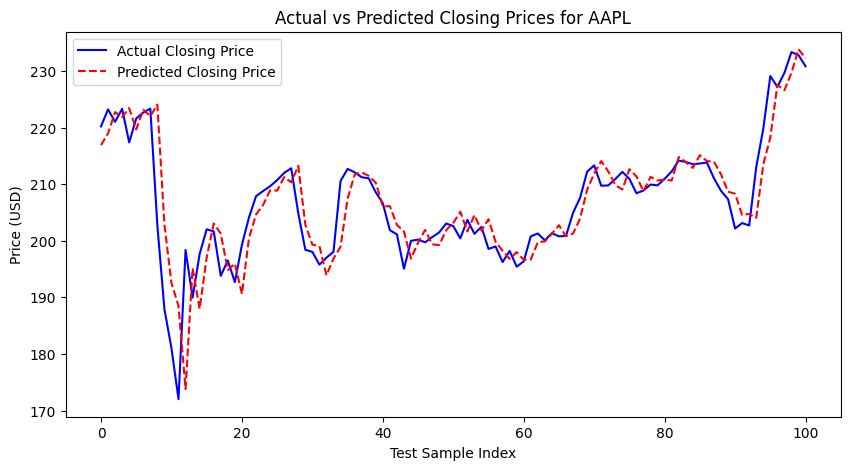

In [7]:
# Step 5: Plot actual vs predicted closing prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Closing Price", color="blue")
plt.plot(y_pred, label="Predicted Closing Price", color="red", linestyle="--")
plt.title(f"Actual vs Predicted Closing Prices for {ticker_symbol}")
plt.xlabel("Test Sample Index")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Conclusion

The Linear Regression model achieved a Mean Absolute Error (MAE) of ~3.48 USD and an R² score of ~0.73, meaning it can explain about 73% of the variance in the stock’s next-day closing prices. This is a reasonable performance for a simple regression model without complex time-series features, but there is still room for improvement using more advanced models or additional predictors.

The actual vs predicted closing price plot shows that the predicted line generally follows the actual price trend, indicating the model captures the overall market direction. However, there are noticeable deviations during sharp price movements, the model tends to underestimate peaks and overestimate dips, which is common in linear models for volatile financial data.